In [1]:
%matplotlib inline
# from sklearn.ensemble import RandomForestClassifier
# import optuna
import xgboost as xgb
# import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import smogn
import pandas
# import seaborn
# from fastkde import fastKDE

from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE, family='serif')    # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['mathtext.rm'] = 'serif'

# Load data

In [3]:
df = pd.read_csv("../data/train/train_dr16_qsoz.csv")
# features = df.columns[:9]
features = features = ['ug', 'gr', 'ri', 'iz', 'zw1', 'w12']
X = df[features]
y = df['z']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=8888)

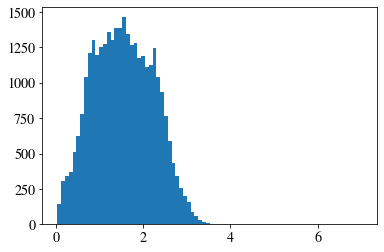

In [11]:
plt.hist(df.z, bins=80);

# Train model using XGBoost CV-best parameters

## 1. Train & save the model

In [7]:
# param = {
#     'n_estimators': 10000,
#     'verbosity': 1,
#     'booster': 'gbtree',
#     'tree_method': 'gpu_hist',
#     'learning_rate': 0.01,     
#     'reg_lambda': 1.74,
#     'reg_alpha': 1.50,
#     'max_depth': 9,
#     'gamma': 0.0072,
#     'grow_policy': 'depthwise',
#     'min_child_weight': 5,
#     'subsample': 0.68,
#     'colsample_bytree': 0.88,
#     'random_state': 8888,
#     'n_jobs': 44
# }

# # {'lambda': 1.7424482416766678, 'alpha': 1.5027220970436779, 'max_depth': 9, 
# #  'eta': 0.1, 'gamma': 0.007205212094899174, 'grow_policy': 'depthwise', 
# #  'min_child_weight': 5, 'subsample': 0.6837851333378417, 'colsample_bytree': 0.8754247188875044}

# # {'lambda': 1.7424482416766678, 'alpha': 1.5027220970436779, 'max_depth': 9, 
# #  'eta': 0.1, 'gamma': 0.007205212094899174, 'grow_policy': 'depthwise', 
# #  'min_child_weight': 5, 'subsample': 0.6837851333378417, 'colsample_bytree': 0.8754247188875044}

In [13]:
xgbr = xgb.XGBRegressor(objective='reg:squarederror', 
                        n_estimators = 5000,
#                         **param
                       )

In [14]:
xgbr.fit(X_train, y_train, sample_weight=None, early_stopping_rounds=500, 
#          eval_metric="rmse",
         eval_set=[(X_test, y_test)])

[0]	validation_0-rmse:0.92459
[1]	validation_0-rmse:0.69958
[2]	validation_0-rmse:0.55627
[3]	validation_0-rmse:0.46789
[4]	validation_0-rmse:0.41734
[5]	validation_0-rmse:0.38947
[6]	validation_0-rmse:0.37448
[7]	validation_0-rmse:0.36697
[8]	validation_0-rmse:0.36254
[9]	validation_0-rmse:0.35908
[10]	validation_0-rmse:0.35837
[11]	validation_0-rmse:0.35705
[12]	validation_0-rmse:0.35538
[13]	validation_0-rmse:0.35529
[14]	validation_0-rmse:0.35525
[15]	validation_0-rmse:0.35477
[16]	validation_0-rmse:0.35491
[17]	validation_0-rmse:0.35482
[18]	validation_0-rmse:0.35484
[19]	validation_0-rmse:0.35496
[20]	validation_0-rmse:0.35497
[21]	validation_0-rmse:0.35474
[22]	validation_0-rmse:0.35446
[23]	validation_0-rmse:0.35434
[24]	validation_0-rmse:0.35431
[25]	validation_0-rmse:0.35430
[26]	validation_0-rmse:0.35427
[27]	validation_0-rmse:0.35441
[28]	validation_0-rmse:0.35414
[29]	validation_0-rmse:0.35289
[30]	validation_0-rmse:0.35289
[31]	validation_0-rmse:0.35283
[32]	validation_0-

[260]	validation_0-rmse:0.36096
[261]	validation_0-rmse:0.36101
[262]	validation_0-rmse:0.36093
[263]	validation_0-rmse:0.36106
[264]	validation_0-rmse:0.36113
[265]	validation_0-rmse:0.36113
[266]	validation_0-rmse:0.36120
[267]	validation_0-rmse:0.36119
[268]	validation_0-rmse:0.36118
[269]	validation_0-rmse:0.36118
[270]	validation_0-rmse:0.36123
[271]	validation_0-rmse:0.36124
[272]	validation_0-rmse:0.36128
[273]	validation_0-rmse:0.36130
[274]	validation_0-rmse:0.36117
[275]	validation_0-rmse:0.36119
[276]	validation_0-rmse:0.36118
[277]	validation_0-rmse:0.36125
[278]	validation_0-rmse:0.36125
[279]	validation_0-rmse:0.36123
[280]	validation_0-rmse:0.36121
[281]	validation_0-rmse:0.36123
[282]	validation_0-rmse:0.36124
[283]	validation_0-rmse:0.36131
[284]	validation_0-rmse:0.36131
[285]	validation_0-rmse:0.36132
[286]	validation_0-rmse:0.36138
[287]	validation_0-rmse:0.36135
[288]	validation_0-rmse:0.36131
[289]	validation_0-rmse:0.36129
[290]	validation_0-rmse:0.36140
[291]	va

[517]	validation_0-rmse:0.36559
[518]	validation_0-rmse:0.36558
[519]	validation_0-rmse:0.36552
[520]	validation_0-rmse:0.36552
[521]	validation_0-rmse:0.36558
[522]	validation_0-rmse:0.36563
[523]	validation_0-rmse:0.36562
[524]	validation_0-rmse:0.36557
[525]	validation_0-rmse:0.36562
[526]	validation_0-rmse:0.36563
[527]	validation_0-rmse:0.36569
[528]	validation_0-rmse:0.36569
[529]	validation_0-rmse:0.36573
[530]	validation_0-rmse:0.36584
[531]	validation_0-rmse:0.36590
[532]	validation_0-rmse:0.36593
[533]	validation_0-rmse:0.36587
[534]	validation_0-rmse:0.36590
[535]	validation_0-rmse:0.36592
[536]	validation_0-rmse:0.36593
[537]	validation_0-rmse:0.36593
[538]	validation_0-rmse:0.36598
[539]	validation_0-rmse:0.36600
[540]	validation_0-rmse:0.36601
[541]	validation_0-rmse:0.36604
[542]	validation_0-rmse:0.36606
[543]	validation_0-rmse:0.36607
[544]	validation_0-rmse:0.36608
[545]	validation_0-rmse:0.36612
[546]	validation_0-rmse:0.36613
[547]	validation_0-rmse:0.36609
[548]	va

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=5000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [15]:
xgbr.save_model("../output/models/xgb_qso_photoz.json")
# xgbr = xgb.XGBRegressor()
# xgbr.load_model("best_gpq_photoz_xgb_sep2021.json")

In [16]:
y_pred = xgbr.predict(X_test)

In [17]:
rms = np.sqrt(np.mean((y_test - y_pred) ** 2))
print("RMS error = %.4g" % rms)

RMS error = 0.3521


In [18]:
dz = y_test - y_pred
med_dz = np.nanmedian(dz)

In [19]:
nmad = 1.48 * np.nanmedian(np.abs((dz-med_dz)/(1+y_test)))

In [20]:
nmad

0.06912356652446572

In [21]:
zacc = (y_test - y_pred)/(1+y_test)
zacc = abs(zacc)
out_frac = len(zacc[zacc>0.15])/len(zacc)
out_frac *=100
out_frac

14.647491011411597

/var/folders/83/v8zdmt25491_9m39df4cg4sr0000gn/T/ipykernel_24587/1826137446.py:9: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("magma").copy()
  cmap.set_bad('w', 1.)
/var/folders/83/v8zdmt25491_9m39df4cg4sr0000gn/T/ipykernel_24587/1826137446.py:14: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(H).T, origin='lower',


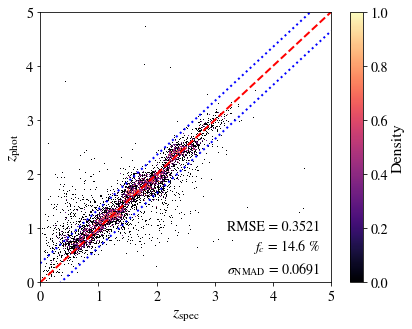

In [22]:
axis_lim = np.array([0, 5])
rms = np.sqrt(np.mean((y_test - y_pred) ** 2))
H, xbins, ybins = np.histogram2d(y_test, y_pred,
                                 bins=(np.linspace(0, 5, 300),
                                       np.linspace(0, 5, 300)))

# Create a black and white color map where bad data (NaNs) are white
cmap = plt.cm.magma
cmap.set_bad('w', 1.)

# Use the image display function imshow() to plot the result
fig, ax = plt.subplots(figsize=(6, 4.8))
# H[H == 0] = 1  # prevent warnings in log10
im = ax.imshow(np.log10(H).T, origin='lower',
          extent=[xbins[0], xbins[-1], ybins[0], ybins[-1]],
          cmap=cmap, interpolation='nearest',
          aspect='auto')
ax.plot(axis_lim, axis_lim, '--r', lw=2)
ax.plot(axis_lim, axis_lim + rms, ':b', lw=2)
ax.plot(axis_lim, axis_lim - rms, ':b', lw=2)
plt.xlim(axis_lim)
plt.ylim(axis_lim)
# plt.gca().set_aspect('equal', adjustable='box')
ax.text(0.96, 0.18, "RMSE = %.4g" % rms,
         ha='right', va='bottom', transform=ax.transAxes,
         bbox=dict(ec='w', fc='w'), 
#         fontsize=14
       )
ax.text(0.96, 0.1, "$f_{c}$ = %.1f %%" % out_frac,
         ha='right', va='bottom', transform=ax.transAxes,
         bbox=dict(ec='w', fc='w'), 
#         fontsize=14
       )
ax.text(0.96, 0.02, "$\sigma_{\mathrm{NMAD}}$ = %.4f" % nmad,
         ha='right', va='bottom', transform=ax.transAxes,
         bbox=dict(ec='w', fc='w'), 
#         fontsize=14
       )


ax.set_xlabel(r'$z_{\mathrm{spec}}$', 
#               fontsize=16
             )
ax.set_ylabel(r'$z_{\mathrm{phot}}$', 
#               fontsize=16
             )
plt.colorbar(im, ax=ax, label='Density')
# ax.set_xlim(-0.6, 2.5)
# ax.set_ylim(-0.6, 2.5)
plt.tight_layout()
# plt.savefig("experiments2021/photoz_rms_all.pdf",dpi=300)

In [23]:
X_test

,ug,gr,ri,iz,zw1,w12
12301,0.32559,0.03352,0.13267,0.03132,0.168031,0.129999
5907,0.18046,0.16329,0.26279,0.19430,1.125381,0.025000
4617,0.13388,0.03778,0.26342,0.01212,0.779601,0.578999
10876,0.94289,0.14250,0.21877,0.27598,-0.022340,0.501999
23601,0.08577,-0.15013,0.46741,0.47161,0.737901,0.124998
...,...,...,...,...,...,...
144,0.13872,0.12560,0.09625,0.04791,0.388671,0.483999
19026,0.23778,0.16672,0.05449,0.27341,1.888709,-0.160000
18079,0.70526,0.25652,0.12289,0.07276,0.673451,0.227999
6529,0.31927,0.07797,0.27095,-0.03089,0.955310,0.621000


/home/yuming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/yuming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/yuming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

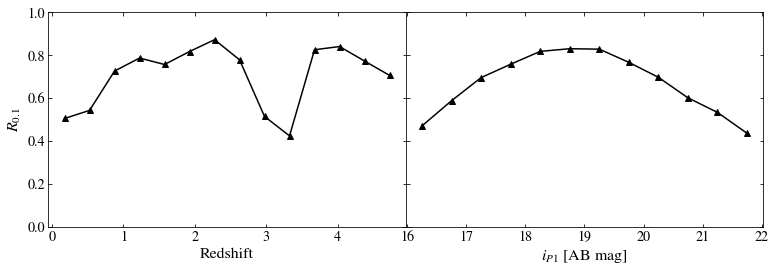

In [56]:
df_test['photoz'] = y_pred

dfz = df_test[["redshift","photoz","o_i"]]
bins = np.arange(0,5,0.35)
idbins = np.arange(1,len(np.arange(0,5,0.35)),1)
dfz["zbin"] = pd.cut(dfz["redshift"], bins,labels=idbins)

grouped = dfz.groupby('zbin')
dfz[dfz['zbin']==9]
acclist = []

for nbin, dfg in grouped:
    zacc = (dfg["redshift"] - dfg["photoz"])/(1+dfg["redshift"])
    zacc = abs(zacc)
    acclist.append(len(zacc[zacc<0.1])/len(zacc))

newbinsz = np.arange(0.175,4.8,0.35)


bins2 = np.arange(16,22.1,0.5)
idbins2 = np.arange(1,len(bins2),1)
dfz["ibin"] = pd.cut(dfz["o_i"], bins2,labels=idbins2)
grouped2 = dfz.groupby('ibin')
acclist2 = []

for nbin, dfg in grouped2:
    zacc = (dfg["redshift"] - dfg["photoz"])/(1+dfg["redshift"])
    zacc = abs(zacc)
    acclist2.append(len(zacc[zacc<0.1])/len(zacc))

newbinsi = np.arange(16.25,21.8,0.5)


fig, (ax1, ax2) = plt.subplots(1,2,
                               figsize=(11,4),
                               sharey=True,
                               gridspec_kw={'hspace': 0,
                                            'wspace': 0})
ax1.plot(newbinsz,acclist,marker="^",c="k")
ax1.set_ylim([0,1])
# ax1.grid(ls=":",c="grey")
ax1.set_xlabel("Redshift")
ax1.set_ylabel("$R_{0.1}$")
ax2.plot(newbinsi,acclist2,marker="^",c="k")
ax2.set_ylim([0,1])
ax2.set_xlabel("$i_{P1}$ [AB mag]")
# ax2.set_ylabel("$R_{0.1}$")
# ax2.grid(ls=":",c="grey")
fig.tight_layout()
# fig.savefig("R01_photoz.pdf",dpi=300)
# plt.savefig("experiments2021/R01_photoz_all.pdf",dpi=300)

Text(0.5, 0, '$\\mathrm{z_{spec}}$')

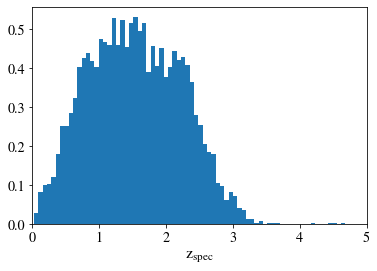

In [24]:
plt.hist(y_test,bins=100,density=True)
plt.xlim(0,5)
plt.xlabel(r'$\mathrm{z_{spec}}$', fontsize=16)

Text(0.5, 0, '$\\mathrm{z_{phot}}$')

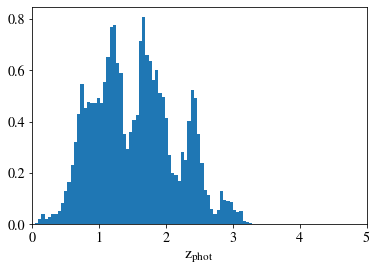

In [25]:
plt.hist(y_pred,bins=100,density=True)
plt.xlim(0,5)
plt.xlabel(r'$\mathrm{z_{phot}}$', fontsize=16)

(-2.0, 2.0)

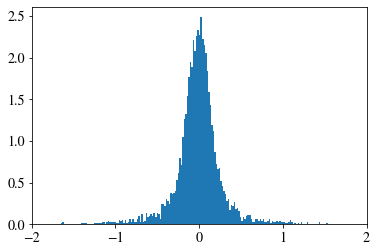

In [26]:
plt.hist((y_test-y_pred),bins=500,density=True)
plt.xlim(-2,2)


In [21]:
# xgbr.get_booster().feature_names = ['gw1', 'rw1', 'iw1', 'zw1', 'yw1', 'w12', 'w23']


In [27]:
xgbr

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=5000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

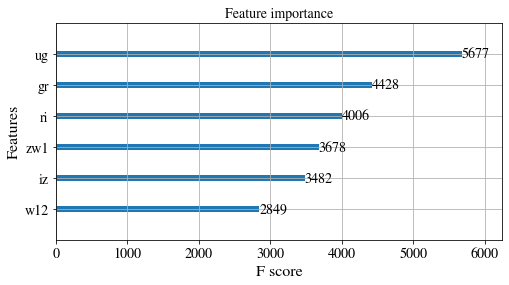

In [28]:
fig, ax = plt.subplots(figsize=(8, 4))
xgb.plot_importance(xgbr.get_booster(),ax=ax)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.584217 to fit


<AxesSubplot:>

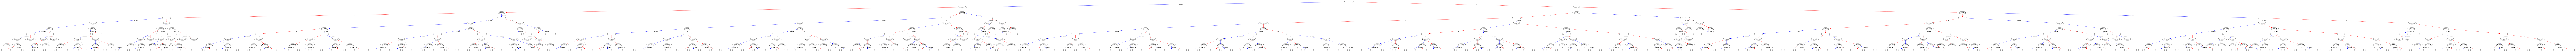

In [12]:
fig, ax = plt.subplots(figsize=(500, 60))
xgb.plot_tree(newmod.get_booster(), ax=ax)